Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
import thinkstats2
import thinkplot
import nsfg

import numpy as np
import pandas as pd

In [ ]:
resp = chap01soln.ReadFemResp()

In [2]:
fem = nsfg.ReadFemPreg()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [22]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='unbiased')
first = fem[fem.birthord == 1]
other = fem[fem.birthord != 1]
first_pmf = thinkstats2.Pmf(first.prglngth)
other_pmf = thinkstats2.Pmf(other.prglngth)

Display the PMF.

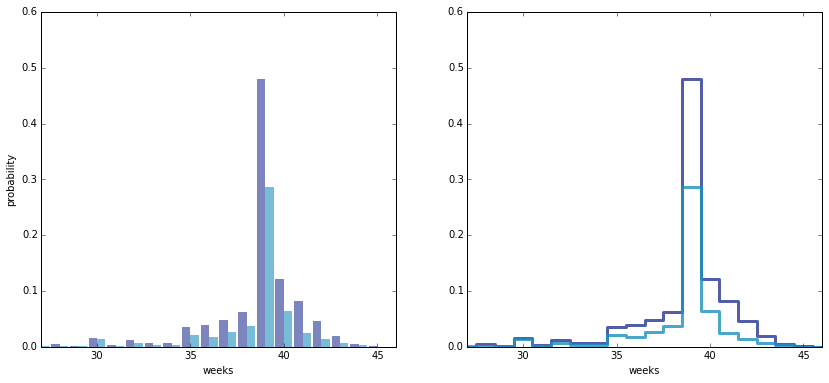

In [17]:
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left',width=width)
thinkplot.Config(xlabel='weeks',
                ylabel='probability',
                axis=[27,46,0,0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf,other_pmf])
thinkplot.Show(xlabel='weeks', axis=[27,46,0,0.6])

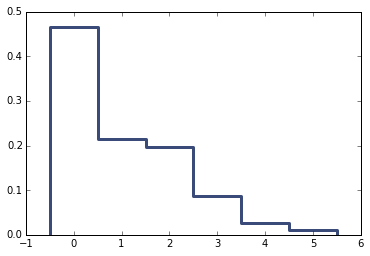

In [18]:
thinkplot.Pmf(pmf)

Define <tt>BiasPmf</tt>.

In [19]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

Display the actual Pmf and the biased Pmf on the same axes.

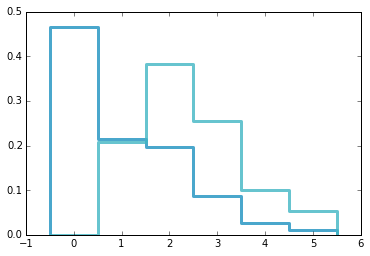

In [23]:
b_pmf = BiasPmf(pmf, label='biased')
thinkplot.Pmfs([pmf, b_pmf])

Compute the means of the two Pmfs.

In [37]:
def PmfMean(pmf):
    mean = 0
    for x, p in pmf.Items():
        mean += p*x
    return mean

def PmfVar(pmf):
    var = 0
    mean = PmfMean(pmf)
    for x, p in pmf.Items():
        var += p*pow((x-mean),2)
    return var

In [38]:
print PmfMean(pmf), pmf.Mean()
print PmfVar(pmf), pmf.Var()

1.02420515504 1.02420515504
1.41286432635 1.41286432635


In [35]:
df = pd.DataFrame(array, columns=list('AB'), index=list('abcd'))
df.loc['a':'c']

,A,B
a,0.134602,0.369200
b,-0.716803,0.321828
c,-1.061913,-1.084499


In [27]:
live = fem[fem.outcome == 1]
map = nsfg.MakePregMap(live)
diffs = []
for x, v in map.iteritems():
    if len(v) > 1:
        rows = fem.iloc[v]
        other_avg_prglngth = rows[rows.birthord > 1].prglngth.mean()
        diff = rows[rows.birthord == 1].prglngth.iloc[0] - other_avg_prglngth
        diffs.append(abs(diff*7*24))

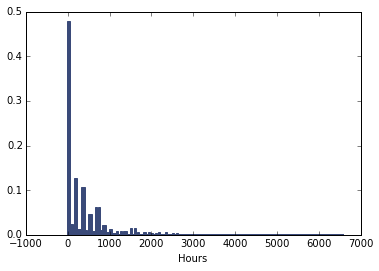

In [39]:
prg_pmf = thinkstats2.Pmf(diffs)
thinkplot.Pmf(prg_pmf)
thinkplot.Show(xlabel='Hours', cuts=range(200)*10)